# Comparação entre a quantidade de projetos criados e a quantidade de projetos finalizados no decorrer do tempo

**ISSUE:** [#19](https://github.com/lappis-unb/salic-ml/issues/19)

**Objetivo:** Identificar para cada ano quantos projetos são criados no Salic e quantos projetos são finalizados, onde um projeto finalizado pode ser tanto um projeto que foi concluído 100% quanto um projeto que acabou no meio do processo.

## Prepararando os dados

**Recarregar automaticamente os módulos.**

In [5]:
%load_ext autoreload
%autoreload 2

**Importando módulos python.**

In [6]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from salicml.utils.dates import Dates
from salicml.models.projects import Projects

PROJECT_ROOT = os.path.abspath(os.path.join(os.pardir, os.pardir))
DATA_FOLDER = os.path.join(PROJECT_ROOT, 'data', 'raw')

**Carregando os dados da tabela de Projetos.**

In [47]:
cols = ['IdPRONAC', 'DtProtocolo', 'Situacao', 'DtSituacao']
projects_csv = os.path.join(DATA_FOLDER, 'projetos.csv')

projects = Projects(projects_csv)

df_projects = projects.data_frame.filter(items = cols)
display(df_projects.head())

,IdPRONAC,DtProtocolo,Situacao,DtSituacao
0,1,2008-09-12 00:00:00,E63,2011-10-25 15:52:33
1,2,2008-09-12 00:00:00,G43,2008-11-19 00:00:00
2,3,2008-09-12 00:00:00,K00,2008-10-14 00:00:00
3,4,2008-09-03 00:00:00,E25,2017-07-27 11:47:56
4,5,2008-09-12 00:00:00,E36,2010-12-06 13:19:12


## Definindo quais anos estarão na análise

A análise desse notebook irá utilizar o período de 2009 até 2017.

In [48]:
initial_year = 2009
final_year   = 2017

years = [i for i in range(initial_year, final_year + 1)]

## Identificando quantos projetos foram criados em cada ano

Analisando o banco de dados do Salic a coluna que mais se enquadrou como uma data de criação de um projeto foi a coluna 'DtProcolo', logo essa será a coluna utilizada para analisar em qual ano o projeto foi criado.

Identificado quantos projetos foram criados em cada ano no período da análise.

In [49]:
created_projects = []

for year in years:
    project_created_after_begin_year = df_projects['DtProtocolo'] >= '{}-01-01'.format(year)
    project_created_before_end_year = df_projects['DtProtocolo'] <= '{}-12-31'.format(year)
    
    created_projects_filter = project_created_after_begin_year & project_created_before_end_year
    
    created_projects.append(len(df_projects[created_projects_filter]))

Tabela apresentando quantos projetos foram criados por ano.

In [50]:
data = {'Ano': years, 'Projetos Criados': created_projects}
df_created_projects = pd.DataFrame(data = data)
display(df_created_projects)

,Ano,Projetos Criados
0,2009,9181
1,2010,13532
2,2011,14068
3,2012,10016
4,2013,11534
5,2014,14419
6,2015,11274
7,2016,5097
8,2017,9422


Gráfico apresentando quantos projetos foram criados por ano.

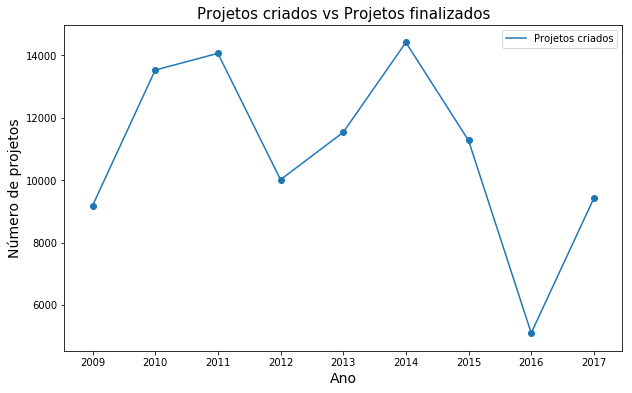

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

plt.plot(years, created_projects)
plt.scatter(years, created_projects)

plt.legend(['Projetos criados'], loc='best')
plt.xlabel('Ano', fontsize = 14)
plt.ylabel('Número de projetos', fontsize = 14)
plt.title('Projetos criados vs Projetos finalizados', fontsize = 15)
plt.show()

## Identificando quantos projetos foram finalizados em cada ano

Não foi encontrado no banco de dados do Salic a data de finalização de um projeto, porém foi identificado que essa informação pode ser obtida através da situação de um projeto.

Cada projeto no banco de dados do Salic possui uma situação, que é uma sigla que indica a situação do projeto, 
analisando o banco de dados e através de troca de mensagens e e-mails com o pessoal que desenvolve o Salic e
o pessoal do ministério, foram identificadas situações que indicam que o projeto foi finalizado, os resultados
das mensagens e dos e-mails estão documentados na [issue](https://github.com/lappis-unb/salic-ml/issues/19).

As seguintes situações indicam que um projeto foi finalizado

In [52]:
end_situations = ['A09', 'A13', 'A14', 'A16', 'A17', 'A18', 'A20', 'A23', 'A24', 'A26', 'A40', 'A41',
                  'A42', 'C09', 'D18', 'E04', 'E09', 'E47', 'E49', 'E63', 'E64', 'E65', 'G16', 'G25',
                  'G26', 'K00', 'K01', 'K02', 'L01', 'L02', 'L03', 'L04', 'L05', 'L06', 'L08', 'L09', 
                  'L10', 'L11']

Definindo filtro para identificar quais projetos possuem a situação de finalizado.

In [59]:
filter_end_situation = df_projects['Situacao'].isin(end_situations)

Identificado quantos projetos foram finalizados em cada ano no período da análise.

Para identificar o ano em que o projeto foi finalizado será utilizado a coluna 'DtSituacao' da tabela 'Projetos', pois já que se possui os projetos com a situação de finalizado a data dessa situação indica quando o projeto foi finalizado.

In [70]:
finished_projects = []

for year in years:
    project_finished_after_begin_year = df_projects['DtSituacao'] >= '{}-01-01'.format(year)
    project_finished_before_end_year = df_projects['DtSituacao'] <= '{}-12-31'.format(year)
    
    finished_projects_filter = (filter_end_situation & 
                                project_finished_after_begin_year & 
                                project_finished_before_end_year)
    
    finished_projects.append(len(df_projects[finished_projects_filter]))

Tabela apresentando quantos projetos foram finalizados por ano.

In [71]:
data = {'Ano': years, 'Projetos Finalizados': finished_projects}
df_finished_projects = pd.DataFrame(data = data)
display(df_finished_projects)

,Ano,Projetos Finalizados
0,2009,5923
1,2010,2991
2,2011,5359
3,2012,5604
4,2013,4915
5,2014,4870
6,2015,6368
7,2016,2904
8,2017,6477


Gráfico apresentando quantos projetos foram finalizados por ano.

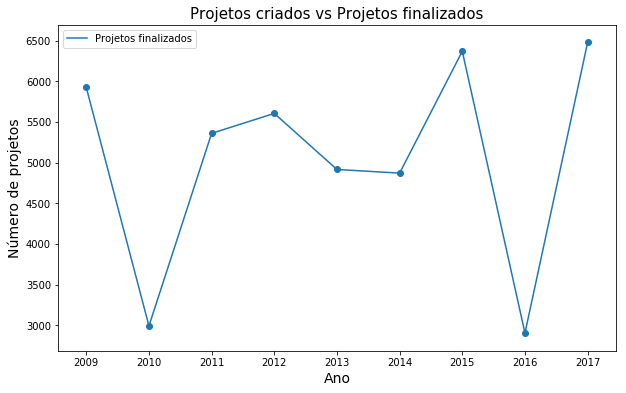

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

plt.plot(years, finished_projects)
plt.scatter(years, finished_projects)

plt.legend(['Projetos finalizados'], loc='best')
plt.xlabel('Ano', fontsize = 14)
plt.ylabel('Número de projetos', fontsize = 14)
plt.title('Projetos criados vs Projetos finalizados', fontsize = 15)
plt.show()

**--------------------**

**Separar projetos criados e projetos finalizados por ano**

In [8]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
end_situations = ['A09', 'A13', 'A14', 'A16', 'A17', 'A18', 'A20', 'A23', 'A24', 'A26', 'A40', 'A41',
                  'A42', 'C09', 'D18', 'E04', 'E09', 'E47', 'E49', 'E63', 'E64', 'E65', 'G16', 'G25',
                  'G26', 'K00', 'K01', 'K02', 'L01', 'L02', 'L03', 'L04', 'L05', 'L06', 'L08', 'L10',
                  'L11']

created_projects = []
finished_projects = []

for year in years:
    project_created_after_begin_year = dt_projetos['DtProtocolo'] > '{}-01-01'.format(year)
    project_created_before_end_year = dt_projetos['DtProtocolo'] < '{}-12-31'.format(year)
    
    created_projects_filter = project_created_after_begin_year & project_created_before_end_year
    finished_projects_filter = created_projects_filter & dt_projetos['Situacao'].isin(end_situations)
    
    created_projects.append(len(dt_projetos[created_projects_filter]))
    finished_projects.append(len(dt_projetos[finished_projects_filter]))

    
created_projects_percentage = [0] + [(created_projects[i] - created_projects[i - 1]) * 100 / created_projects[i - 1] for i in range(1, len(created_projects))]
finished_projects_percentage = [0] + [(finished_projects[i] - finished_projects[i - 1]) * 100 / finished_projects[i - 1] for i in range(1, len(finished_projects))]

**Tabela de crescimento de projetos criados e finalizados**

In [9]:
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color


data = {'Ano': years, 'Projetos Criados': created_projects, 'Projetos Criados %': created_projects_percentage,
        'Projetos Fechados': finished_projects, 'Projetos Fechados %': finished_projects_percentage}

df = pd.DataFrame(data = data)
dt = pd.DataFrame(data = data)

subset = pd.IndexSlice[:, ['Projetos Criados %', 'Projetos Fechados %']]

df = df.style.applymap(color_negative_red, subset = subset)

display(df)

,Ano,Projetos Criados,Projetos Criados %,Projetos Fechados,Projetos Fechados %
0,2009,9181,0,5159,0
1,2010,13532,47.3914,6863,33.0297
2,2011,14068,3.96098,5811,-15.3286
3,2012,10016,-28.803,4759,-18.1036
4,2013,11534,15.1558,5635,18.4072
5,2014,14419,25.013,5294,-6.05146
6,2015,11274,-21.8115,2795,-47.2044
7,2016,5097,-54.7898,1269,-54.5975
8,2017,9422,84.8538,3058,140.977


In [10]:
### Gráfico de projetos iniciados Vs projetos finalizados ao longo do tempo

Index(['Ano', 'Projetos Criados', 'Projetos Criados %', 'Projetos Fechados',
       'Projetos Fechados %'],
      dtype='object')

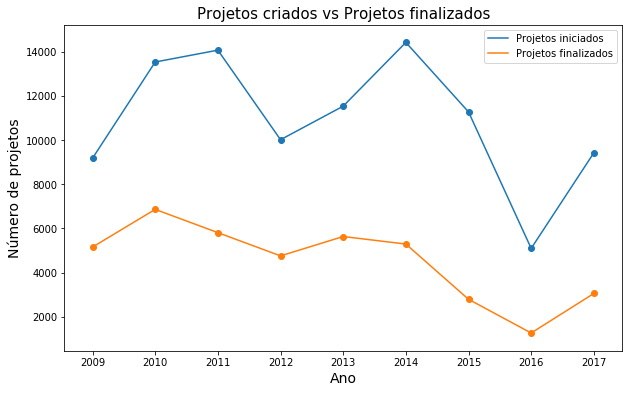

In [11]:
from scipy.interpolate import interp1d

display(dt.columns)
dt['Ano'] = pd.to_numeric(dt['Ano'])

years = dt['Ano'].values
created = dt['Projetos Criados'].values
finished = dt['Projetos Fechados'].values

#plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

plt.plot(years, created)
plt.plot(years, finished)
plt.scatter(years, created)
plt.scatter(years, finished)

plt.legend(['Projetos iniciados', 'Projetos finalizados'], loc='best')
plt.xlabel('Ano', fontsize = 14)
plt.ylabel('Número de projetos', fontsize = 14)
plt.title('Projetos criados vs Projetos finalizados', fontsize = 15)
plt.show()

In [12]:
def plot_1d_liner_regression(x, y, color = None, alpha = None):
    from sklearn import linear_model

    x = x.reshape(-1, 1)
    
    body_reg = linear_model.LinearRegression()
    body_reg.fit(x, y)

    prediction = body_reg.predict(np.sort(x, axis=0))

    plt.plot(np.sort(x, axis=0), prediction, color=color, alpha=alpha)

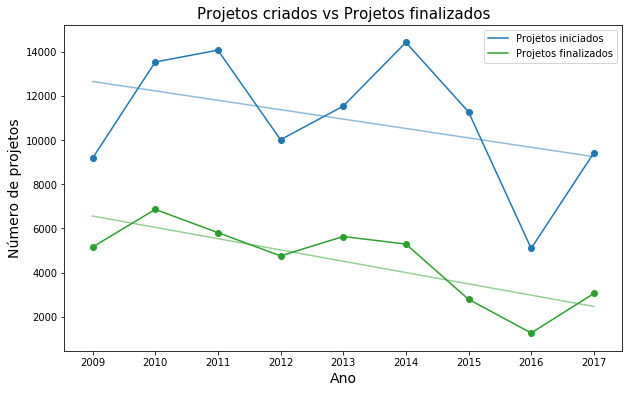

In [13]:
#plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

plt.plot(years, created)
plt.plot(years, finished, color='C2')
plt.scatter(years, created, color='C0')
plt.scatter(years, finished, color='C2')

plt.legend(['Projetos iniciados', 'Projetos finalizados'], loc='best')
plt.xlabel('Ano', fontsize = 14)
plt.ylabel('Número de projetos', fontsize = 14)
plt.title('Projetos criados vs Projetos finalizados', fontsize = 15)

plot_1d_liner_regression(years, created, color='C0', alpha=0.5)
plot_1d_liner_regression(years, finished, color='C2', alpha=0.5)

### Calculando a média do número de itens em uma planilha orçamentária aprovada

**Carregando a tabela com preços aprovados dos itens de todos os projetos**

In [14]:
tb_planilha_projeto_csv = os.path.join(DATA_FOLDER, 'dt_tb_planilha_projeto_2013.csv')

dt_planilha = pd.read_csv(tb_planilha_projeto_csv, low_memory = False)

dt_planilha.head()

,Unnamed: 0,idPRONAC,Situacao,DtProtocolo
0,0,111109,E36,2009-01-22 15:29:39
1,1,111109,E36,2009-01-22 15:29:39
2,2,111109,E36,2009-01-22 15:29:39
3,3,111109,E36,2009-01-22 15:29:39
4,4,111109,E36,2009-01-22 15:29:39


**Adicionando data do projeto na planilha orçamentária**

**Utilizando projetos somente com data de projeto maior ou igual a 2013**

In [18]:
from datetime import datetime

START_DATE = datetime(day=1, month=1, year=2013)
date_column = 'DtProtocolo'
dt_planilha[date_column] = pd.to_datetime(dt_planilha[date_column], format = Dates.DATE_INPUT_FORMAT)
dt_planilha = dt_planilha[dt_planilha.loc[:, date_column] >= START_DATE]

**Projeto de exemplo para testar a data do projeto**

In [19]:
example_project = dt_planilha[dt_planilha.loc[:, 'idPRONAC'] == 210310]
display(example_project.head())
print('len(example_project) = {}'.format(len(example_project)))

,Unnamed: 0,idPRONAC,Situacao,DtProtocolo
2241751,2241751,210310,E12,2017-07-27 11:06:04
2241752,2241752,210310,E12,2017-07-27 11:06:04
2241753,2241753,210310,E12,2017-07-27 11:06:04
2241754,2241754,210310,E12,2017-07-27 11:06:04
2241755,2241755,210310,E12,2017-07-27 11:06:04


len(example_project) = 123


### Média do número de itens em uma planilha orçamentária aprovada

In [20]:
from scipy import stats

unique, counts = np.unique(dt_planilha.idPRONAC.values, return_counts=True)

print('type(counts) = {}'.format(type(counts)))

for id, count in zip(unique, counts):
    if id == 210310:
        print('{}, {}'.format(id, count))

display(pd.DataFrame(counts).describe())

type(counts) = <class 'numpy.ndarray'>
210310, 123


,0
count,26413.000000
mean,48.281717
std,41.889854
min,2.000000
25%,26.000000
50%,39.000000
75%,57.000000
max,1286.000000
